### This notebook preprocess the Amazon Review Dataset for sentiment analysis model training

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Review Reviews dataset
df = pd.read_csv(r"D:\ML_Projects\Amazon-Review-Sentiment-Analysis-System\Data\amazon_reviews.csv")

In [4]:
df.head()

,ProfileName,Summary,Text,Score
0,delmartian,Good Quality Dog Food,I have bought several of the Vitality canned d...,5
1,dll pa,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1
2,"Natalia Corres ""Natalia Corres""","""Delight"" says it all",This is a confection that has been around a fe...,4
3,Karl,Cough Medicine,If you are looking for the secret ingredient i...,2
4,"Michael D. Bigham ""M. Wassir""",Great taffy,Great taffy at a great price. There was a wid...,5


In [5]:
len(df["Text"])

568430

In [ ]:
df['Score'].unique()

array([5, 1, 4, 2, 3], dtype=int64)

In [71]:
df['Text_Length'] = df['Text'].map(lambda l: len(l.split()))

In [15]:
df.head()

,ProfileName,Summary,Text,Score,Text_Length
0,delmartian,Good Quality Dog Food,I have bought several of the Vitality canned d...,5,48
1,dll pa,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1,31
2,"Natalia Corres ""Natalia Corres""","""Delight"" says it all",This is a confection that has been around a fe...,4,94
3,Karl,Cough Medicine,If you are looking for the secret ingredient i...,2,41
4,"Michael D. Bigham ""M. Wassir""",Great taffy,Great taffy at a great price. There was a wid...,5,27


In [19]:
print(f"Median: {df['Text_Length'].median()}")
print(f"Mean: {df['Text_Length'].mean()}")

Median: 56.0
Mean: 80.26340270569816


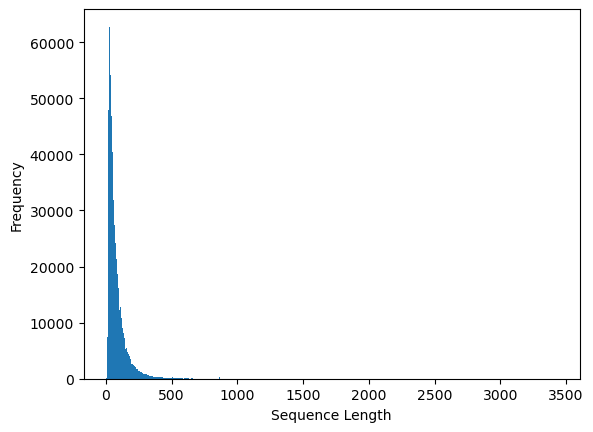

In [50]:
plt.hist(df['Text_Length'], bins=500)
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.show()

In [59]:
print(len(df[df['Text_Length'] < df['Text_Length'].mean()*0.2]))
df[df['Text_Length'] < df['Text_Length'].mean()*0.20]['Text_Length'].max()

7549


16

In [ ]:
ln = 1.59
print(len(df[df['Text_Length'] > df['Text_Length'].mean()*ln]))
print(len(df[df['Text_Length'] > df['Text_Length'].mean()*ln])/len(df))
df[df['Text_Length'] > df['Text_Length'].mean()*ln]['Text_Length'].min()

90938
0.15998100029906936


128

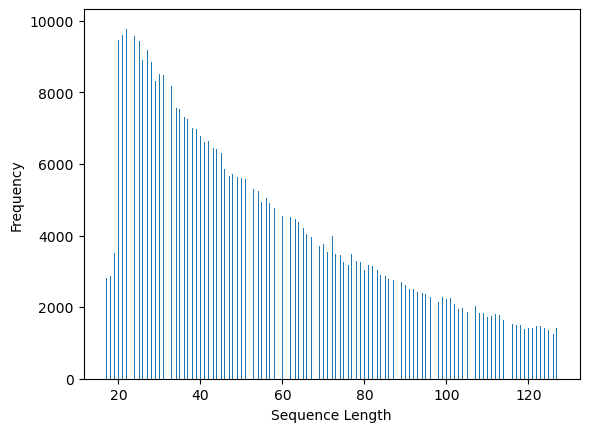

In [60]:
text_len = df[(df['Text_Length'] > df['Text_Length'].mean()*0.2) & (df['Text_Length'] < df['Text_Length'].mean()*1.59)]
plt.hist(text_len['Text_Length'], bins=500)
plt.xlabel("Sequence Length")
plt.ylabel("Frequency")
plt.show()

In [8]:
words = set(" ".join(df['Text']).split())

In [3]:
text = " ".join(df['Text'])

In [6]:
text[:10000]

'I have bought several of the Vitality canned dog food products and have found them all to be of good quality. The product looks more like a stew than a processed meat and it smells better. My Labrador is finicky and she appreciates this product better than  most. Product arrived labeled as Jumbo Salted Peanuts...the peanuts were actually small sized unsalted. Not sure if this was an error or if the vendor intended to represent the product as "Jumbo". This is a confection that has been around a few centuries.  It is a light, pillowy citrus gelatin with nuts - in this case Filberts. And it is cut into tiny squares and then liberally coated with powdered sugar.  And it is a tiny mouthful of heaven.  Not too chewy, and very flavorful.  I highly recommend this yummy treat.  If you are familiar with the story of C.S. Lewis\' "The Lion, The Witch, and The Wardrobe" - this is the treat that seduces Edmund into selling out his Brother and Sisters to the Witch. If you are looking for the secret

In [10]:
import re

words_with_special_chars = [word for word in words if len(re.findall(r'[^\w\s]', word)) > 1]    
words_with_special_chars

['wine/liquor.',
 'evening...<br',
 'Pancreatitis.<br',
 'department...one',
 'reader...)',
 'Ribs!!!!!',
 'Coffee).',
 'booze)?',
 'rancid-oil...',
 '(Wellpet)',
 'butter...a',
 'pump...well...it',
 '22.50%<br',
 '"Boldest"',
 'road-trip,',
 '(reported)',
 '$27.99',
 'resturants.<br',
 '/>Sunflower',
 'substitute.....a',
 'portion!<br',
 'FILL,,,,(NOT',
 'bargains.<br',
 'senseo).',
 'flavor--EH?',
 'minutes.Unfortunately,',
 '"filter"',
 '"harvested/produced',
 "healthy.It's",
 "Classico's,",
 '"caramel,"',
 '"Shimmer"',
 "'gassy'",
 'www.clubsofamerica.com',
 'STEAMING!.',
 'plums;"',
 'mis-shipped.',
 'salads,<br',
 "'pods'",
 'sweet-followed-by-bitter',
 'cake-of-the-month',
 'backwards......LOL.',
 'hole/rope/spikey-rubbery',
 'food....she',
 'people.<br',
 '"espresso",',
 'cravings!!',
 'ARROWHEAD!!',
 '"finish"',
 'this!?',
 'href="http://www.amazon.com/gp/product/B0045H25X4">Tropic',
 'mouth),',
 "for...That's",
 'red-orange.',
 '(zero),',
 'more,thanks,Christel.',
 'GOLD!!',


In [11]:
len(words_with_special_chars)

244901

In [23]:
txt = 'Product received is as..... advertised!!!<br /><br /><a href="http://www.amazon.com/gp/product/B001GVISJM">Twizzlers, Strawberry,,,,, 16-Ounce Bags (Pack of 6)</a>'
txt = re.sub(r'<[^>]*>', ' ', txt)
txt = re.sub(r',+', ',', txt)
txt = re.sub(r'([^\w\s])\1+', ' ', txt)
txt = re.sub(r'\s+', ' ', txt)
txt = txt.strip()
txt

'Product received is as advertised Twizzlers, Strawberry, 16-Ounce Bags (Pack of 6)'

In [ ]:
for iter, (_, row) in enumerate(df.iterrows()):
    txt = row['Text']
    if re.search(r'([^\w\s])\1{1,}', txt):
        print(f"Original: {txt}")
        txt = re.sub(r'<[^>]*>', ' ', txt)
        txt = re.sub(r',+', ',', txt)
        txt = re.sub(r'([^\w\s])\1+', ' ', txt)
        txt = re.sub(r'\s+', ' ', txt)
        txt = txt.strip()
        print(f"Subtit'd: {txt}")
    if iter > 1000:
        break